In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "1"
os.environ['KERAS_BACKEND'] = "tensorflow"
import keras
import keras.layers as lay
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from src.generator import Generator
from src.discriminator import Discriminator
from src.aux_fn import train_step

2025-09-04 01:26:12.607940: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756949172.639023 3412080 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756949172.649315 3412080 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1756949172.673480 3412080 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1756949172.673509 3412080 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1756949172.673512 3412080 computation_placer.cc:177] computation placer alr

In [2]:
(trainx,trainy),(_,_) = keras.datasets.cifar10.load_data()
trainx = trainx[trainy[:,0]==1]
trainx = (tf.cast(trainx,tf.float32)-127.5)/127.5
data4 = tf.data.Dataset.from_tensor_slices((trainx)).map(lambda x: tf.image.resize(x,(4,4))).cache().repeat(120).shuffle(2**10).map(lambda x: tf.image.random_flip_left_right(x)).batch(2**8,drop_remainder=True).prefetch(tf.data.AUTOTUNE)
data8 = tf.data.Dataset.from_tensor_slices((trainx)).map(lambda x: tf.image.resize(x,(8,8))).cache().repeat(120).shuffle(2**10).map(lambda x: tf.image.random_flip_left_right(x)).batch(2**8,drop_remainder=True).prefetch(tf.data.AUTOTUNE)
data16 = tf.data.Dataset.from_tensor_slices((trainx)).map(lambda x: tf.image.resize(x,(16,16))).cache().repeat(120).shuffle(2**10).map(lambda x: tf.image.random_flip_left_right(x)).batch(2**8,drop_remainder=True).prefetch(tf.data.AUTOTUNE)
data32 = tf.data.Dataset.from_tensor_slices((trainx)).map(lambda x: tf.image.resize(x,(32,32))).cache().repeat(120).shuffle(2**10).map(lambda x: tf.image.random_flip_left_right(x)).batch(2**8,drop_remainder=True).prefetch(tf.data.AUTOTUNE)

Cause: could not parse the source code of <function <lambda> at 0x719eff918d60>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
lambda x: tf.image.random_flip_left_right(x)

Match 1:
lambda x: tf.image.resize(x, (4, 4))

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x719eff918d60>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
lambda x: tf.image.random_flip_left_right(x)

Match 1:
lambda x: tf.image.resize(x, (4, 4))

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <fun

I0000 00:00:1756949180.248027 3412080 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10262 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:04:00.0, compute capability: 8.6


Cause: could not parse the source code of <function <lambda> at 0x719eff91b560>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
lambda x: tf.image.random_flip_left_right(x)

Match 1:
lambda x: tf.image.resize(x, (32, 32))

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x719eff91b560>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
lambda x: tf.image.random_flip_left_right(x)

Match 1:
lambda x: tf.image.resize(x, (32, 32))

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of 

In [3]:
gen = Generator(name='Generator')
dis = Discriminator(name='Discriminator')
gen.build()
dis.build()
# gen.summary()
# dis.summary()

In [4]:
bce = keras.losses.BinaryCrossentropy()
opt = [keras.optimizers.Adam(1e-4,.5) for i in range(2)]

# Treinamento 4x4

In [ ]:
# for i in range(120+1):
for _ in range(2):
    for i,batch in enumerate(data4):
        gl, dl = train_step([gen,dis],batch,bce,opt,stage=0)
        if i%234 == 0: print(f'EP = {i}; Gloss = {gl:.4f}; Dloss = {dl:.4f};')

/home/villeneve/venv311/lib/python3.11/site-packages/keras/src/optimizers/base_optimizer.py:857: UserWarning: Gradients do not exist for variables ['Generator/toRGB8/kernel', 'Generator/toRGB8/bias', 'Generator/toRGB16/kernel', 'Generator/toRGB16/bias', 'Generator/toRGB32/kernel', 'Generator/toRGB32/bias', 'Generator/block8_conv0/kernel', 'Generator/block8_conv0/bias', 'Generator/block8_conv1/kernel', 'Generator/block8_conv1/bias', 'Generator/block16_conv0/kernel', 'Generator/block16_conv0/bias', 'Generator/block16_conv1/kernel', 'Generator/block16_conv1/bias', 'Generator/block32_conv0/kernel', 'Generator/block32_conv0/bias', 'Generator/block32_conv1/kernel', 'Generator/block32_conv1/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/home/villeneve/venv311/lib/python3.11/site-packages/keras/src/optimizers/base_optimizer.py:857: UserWarning: Gradients do not exist for variables ['Discriminator/fromRGB8/kernel', 'Di

EP = 0; Gloss = 0.7039; Dloss = 0.7016;
EP = 234; Gloss = 1.4050; Dloss = 0.6167;
EP = 468; Gloss = 0.7571; Dloss = 0.5906;
EP = 702; Gloss = 0.8072; Dloss = 0.6746;
EP = 936; Gloss = 0.7075; Dloss = 0.6829;
EP = 1170; Gloss = 0.6943; Dloss = 0.6855;
EP = 1404; Gloss = 0.6995; Dloss = 0.6832;
EP = 1638; Gloss = 0.7064; Dloss = 0.6938;
EP = 1872; Gloss = 0.7276; Dloss = 0.6843;
EP = 2106; Gloss = 0.7139; Dloss = 0.6948;
EP = 2340; Gloss = 0.6884; Dloss = 0.6968;


2025-09-04 01:27:12.820058: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


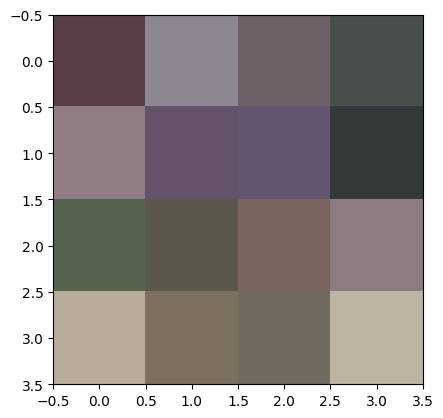

In [12]:
img = gen(tf.random.normal((1,128),0,1),stage=0)
img = np.uint8(img[0]*127.5+127.5)
plt.imshow(img)
plt.show()

# Treinamento 8x8

In [13]:
# for i in range(120+1):
    # gen.fade_in[0].alpha.assign(i/120.)
    # dis.fade_in[0].alpha.assign(i/120.)
for i,batch in enumerate(data8):
    gen.fade_in[0].alpha.assign(i/2344.)
    dis.fade_in[0].alpha.assign(i/2344.)
    gl, dl = train_step([gen,dis],batch,bce,opt,stage=1)
    if i%234 == 0: print(f'EP = {i}; Gloss = {gl:.4f}; Dloss = {dl:.4f};')

gen.fade_in[0].alpha.assign(1.)
dis.fade_in[0].alpha.assign(1.)
for i,batch in enumerate(data8):
    gl, dl = train_step([gen,dis],batch,bce,opt,stage=1)
    if i%234 == 0: print(f'EP = {i}; Gloss = {gl:.4f}; Dloss = {dl:.4f};')

/home/villeneve/venv311/lib/python3.11/site-packages/keras/src/optimizers/base_optimizer.py:857: UserWarning: Gradients do not exist for variables ['Generator/toRGB16/kernel', 'Generator/toRGB16/bias', 'Generator/toRGB32/kernel', 'Generator/toRGB32/bias', 'Generator/block16_conv0/kernel', 'Generator/block16_conv0/bias', 'Generator/block16_conv1/kernel', 'Generator/block16_conv1/bias', 'Generator/block32_conv0/kernel', 'Generator/block32_conv0/bias', 'Generator/block32_conv1/kernel', 'Generator/block32_conv1/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/home/villeneve/venv311/lib/python3.11/site-packages/keras/src/optimizers/base_optimizer.py:857: UserWarning: Gradients do not exist for variables ['Discriminator/fromRGB16/kernel', 'Discriminator/fromRGB16/bias', 'Discriminator/fromRGB32/kernel', 'Discriminator/fromRGB32/bias', 'Discriminator/block16_conv0/kernel', 'Discriminator/block16_conv0/bias', 'Discrimin

EP = 0; Gloss = 0.6963; Dloss = 0.6991;
EP = 234; Gloss = 1.4188; Dloss = 0.2532;
EP = 468; Gloss = 1.1452; Dloss = 0.4798;
EP = 702; Gloss = 0.9933; Dloss = 0.5521;
EP = 936; Gloss = 0.9055; Dloss = 0.6643;
EP = 1170; Gloss = 0.8919; Dloss = 0.6264;
EP = 1404; Gloss = 0.9363; Dloss = 0.6630;
EP = 1638; Gloss = 0.7672; Dloss = 0.6979;
EP = 1872; Gloss = 0.8203; Dloss = 0.6651;
EP = 2106; Gloss = 0.7443; Dloss = 0.6928;
EP = 2340; Gloss = 0.8335; Dloss = 0.6545;
EP = 0; Gloss = 0.7305; Dloss = 0.6723;


2025-09-04 01:30:07.723660: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


EP = 234; Gloss = 0.7438; Dloss = 0.7337;
EP = 468; Gloss = 0.7762; Dloss = 0.6739;
EP = 702; Gloss = 0.8478; Dloss = 0.7244;
EP = 936; Gloss = 0.7672; Dloss = 0.7016;
EP = 1170; Gloss = 0.7349; Dloss = 0.6820;
EP = 1404; Gloss = 0.8171; Dloss = 0.6746;
EP = 1638; Gloss = 0.6807; Dloss = 0.6981;
EP = 1872; Gloss = 0.7817; Dloss = 0.6736;
EP = 2106; Gloss = 0.7721; Dloss = 0.6842;
EP = 2340; Gloss = 0.7989; Dloss = 0.6878;


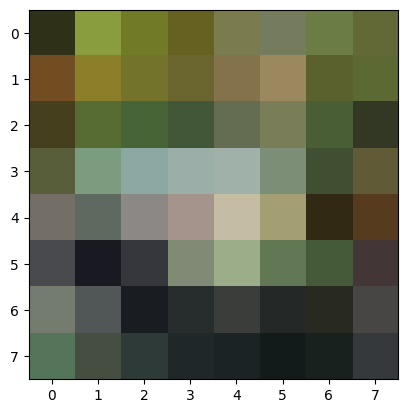

In [21]:
img = gen(tf.random.normal((1,128),0,1),stage=1)
img = np.uint8(img[0]*127.5+127.5)
plt.imshow(img)
plt.show()

# Treinamento 16x16

In [22]:
# for i in range(120+1):
    # gen.fade_in[1].alpha.assign(i/2344.)
    # dis.fade_in[1].alpha.assign(i/2344.)
for i,batch in enumerate(data16):
    gen.fade_in[1].alpha.assign(i/2344.)
    dis.fade_in[1].alpha.assign(i/2344.)
    gl, dl = train_step([gen,dis],batch,bce,opt,stage=2)
    if i%234 == 0: print(f'EP = {i}; Gloss = {gl:.4f}; Dloss = {dl:.4f};')

gen.fade_in[1].alpha.assign(1.)
dis.fade_in[1].alpha.assign(1.)
for i,batch in enumerate(data16):
    gl, dl = train_step([gen,dis],batch,bce,opt,stage=2)
    if i%234 == 0: print(f'EP = {i}; Gloss = {gl:.4f}; Dloss = {dl:.4f};')

/home/villeneve/venv311/lib/python3.11/site-packages/keras/src/optimizers/base_optimizer.py:857: UserWarning: Gradients do not exist for variables ['Generator/toRGB4/kernel', 'Generator/toRGB4/bias', 'Generator/toRGB32/kernel', 'Generator/toRGB32/bias', 'Generator/block32_conv0/kernel', 'Generator/block32_conv0/bias', 'Generator/block32_conv1/kernel', 'Generator/block32_conv1/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/home/villeneve/venv311/lib/python3.11/site-packages/keras/src/optimizers/base_optimizer.py:857: UserWarning: Gradients do not exist for variables ['Discriminator/fromRGB4/kernel', 'Discriminator/fromRGB4/bias', 'Discriminator/fromRGB32/kernel', 'Discriminator/fromRGB32/bias', 'Discriminator/block32_conv0/kernel', 'Discriminator/block32_conv0/bias', 'Discriminator/block32_conv1/kernel', 'Discriminator/block32_conv1/bias'] when minimizing the loss. If using `model.compile()`, did you forget to 

EP = 0; Gloss = 0.8644; Dloss = 0.7003;
EP = 234; Gloss = 0.9269; Dloss = 0.5765;
EP = 468; Gloss = 0.9404; Dloss = 0.6435;
EP = 702; Gloss = 0.7854; Dloss = 0.6782;
EP = 936; Gloss = 0.9159; Dloss = 0.6793;
EP = 1170; Gloss = 0.7732; Dloss = 0.6765;
EP = 1404; Gloss = 0.9268; Dloss = 0.6821;
EP = 1638; Gloss = 0.7615; Dloss = 0.6856;
EP = 1872; Gloss = 0.7601; Dloss = 0.6669;
EP = 2106; Gloss = 1.0321; Dloss = 0.6559;
EP = 2340; Gloss = 0.9119; Dloss = 0.6395;


2025-09-04 01:39:44.604294: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


EP = 0; Gloss = 0.8851; Dloss = 0.6346;
EP = 234; Gloss = 0.8875; Dloss = 0.6780;
EP = 468; Gloss = 1.0261; Dloss = 0.7221;
EP = 702; Gloss = 0.9070; Dloss = 0.6580;
EP = 936; Gloss = 0.9390; Dloss = 0.5343;
EP = 1170; Gloss = 0.8380; Dloss = 0.6711;
EP = 1404; Gloss = 1.0903; Dloss = 0.5192;
EP = 1638; Gloss = 0.9409; Dloss = 0.6560;
EP = 1872; Gloss = 1.9974; Dloss = 0.4602;
EP = 2106; Gloss = 0.8777; Dloss = 0.6395;
EP = 2340; Gloss = 1.0821; Dloss = 0.2821;


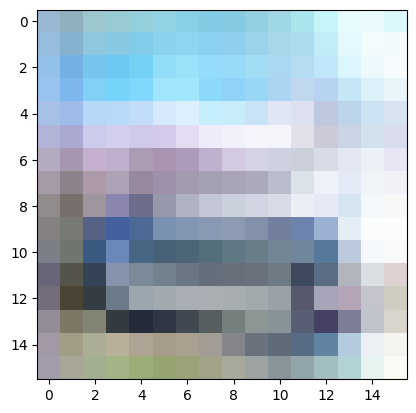

In [29]:
# keras.models.save_model(gen,'gen16.keras')
# keras.models.save_model(dis,'dis16.keras')
img = gen(tf.random.normal((1,128),0,1),stage=2)
img = np.uint8(img[0]*127.5+127.5)
plt.imshow(img)
plt.show()

# Treinamento 32x32

In [ ]:
for i,batch in enumerate(data32):
    gen.fade_in[2].alpha.assign(i/2344.)
    dis.fade_in[2].alpha.assign(i/2344.)
    gl, dl = train_step([gen,dis],batch,bce,opt,stage=3)
    if i%234 == 0: print(f'EP = {i}; Gloss = {gl:.4f}; Dloss = {dl:.4f};')

gen.fade_in[2].alpha.assign(1.)
dis.fade_in[2].alpha.assign(1.)
for i,batch in enumerate(data32):
    gl, dl = train_step([gen,dis],batch,bce,opt,stage=3)
    if i%234 == 0: print(f'EP = {i}; Gloss = {gl:.4f}; Dloss = {dl:.4f};')

In [ ]:
f = 10

imgs = gen(tf.random.normal((f**2,128),0,1),stage=3)
imgs = np.uint8(imgs*127.5+127.5)
fig, ax = plt.subplots(f,f,figsize=(8,8))
ax = ax.ravel()
for i in range(f*f):
    ax[i].imshow(imgs[i])
    ax[i].set_axis_off()
plt.tight_layout(pad=0)
plt.show()

In [ ]:
img = gen(tf.random.normal((1,128)),stage=3)
plt.imshow(np.uint8(img[0]*127.5+127.5))
plt.show()